In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt


# Q1. PCA

In [2]:
# Q1. PCA

# Imports
from sklearn.decomposition import PCA

# Load csv data
with open("PADL-Q1.csv", "r") as f:
    reader = csv.reader(f)
    data_headers = next(reader)
    data = np.array(list(reader)).astype(float)

# Print out data information
print("--- Data ---")
print(data_headers)
print(data[:5])

print("\n--- Variance ---")
data_var = np.var(data, axis=0)
print(sum(data_var))
print(data_var)


--- Data ---
['x1', 'x2', 'x3', 'x4', 'x5']
[[ 0.91890765  3.18388059 -0.08010414  9.3159354   5.2941181 ]
 [-2.46848262  1.69499138 -1.762808    7.91247192  2.4641442 ]
 [-0.86661073 -0.02815577  4.8980317  11.77602453 -4.4810839 ]
 [ 0.15403261  2.63287823 -2.36163801  3.26223239  4.0097756 ]
 [-0.62210432  5.51591972 -0.39977591 12.13958265  6.4871446 ]]

--- Variance ---
114.70494912140819
[ 2.048654    8.03910539 17.88568982 32.31447983 54.41702008]


## a. Apply PCA with n=5

--- data_pca5 Variance ---
114.70494912140809
[61.7643465  34.48928083 11.77245573  5.28311027  1.39575579]
[0.53846279 0.30067823 0.1026325  0.04605826 0.01216823]

--- Variance Proportions ---
First 1 dims variance proportion: 0.5384627862600507
First 2 dims variance proportion: 0.8391410141574704
First 3 dims variance proportion: 0.9417735144837427
First 4 dims variance proportion: 0.9878317735978975
First 5 dims variance proportion: 1.0


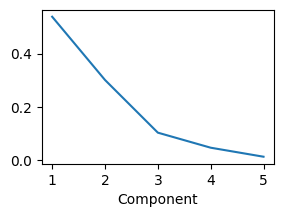

In [3]:
# Apply PCA with 5 components
pca5 = PCA(n_components=5)
data_pca5 = pca5.fit_transform(data)

# Calculate variance of PCA components
print("--- data_pca5 Variance ---")
data_pca5_var = np.var(data_pca5, axis=0)
data_pca5_var_sum = sum(data_pca5_var)
print(data_pca5_var_sum)
print(data_pca5_var)
print(data_pca5_var / data_pca5_var_sum)

# Calculate proportion of variances to sum of variances
print("\n--- Variance Proportions ---")
for i in range(1, 6):
    print(f"First {i} dims variance proportion: {sum(data_pca5_var[:i]) / data_pca5_var_sum}")

# Plot the variance proportions
plt.figure(figsize=(3, 2))
plt.plot(range(1, 6), data_pca5_var / data_pca5_var_sum)
plt.xlabel("Component")
plt.xticks(range(1, 6))
plt.show()


### Reasoning

Summing the proportion of variance held by the first N dimensions:  

- First 2 PCA dimensions hold 83.91% of the variance.  
- First 3 PCA dimensions hold 94.18% of the variance.  
- First 4 PCA dimensions hold 98.78% of the variance.  

This shows dimensions > 3 hold a relatively small percentage of the datasets information.  
Plotting the proportions also shows an inflection point at 3 components.  

Therefore, I believe $D_{min}=3$.


## b. Repeat PCA with n=3

In [4]:
# Apply PCA with 3 components
pca3 = PCA(n_components=3)
data_pca3 = pca3.fit_transform(data)

# Calculate variance of PCA components
print("--- data_pca3 Variance ---")
data_pca3_var = np.var(data_pca3, axis=0)
data_pca3_var_sum = sum(data_pca3_var)
print(data_pca3_var_sum)
print(data_pca3_var)
print(data_pca3_var / data_pca3_var_sum)

# Calculate proportion of variances to sum of variances
print("\n--- Variance Proportions ---")
for i in range(1, 4):
    print(f"First {i} dim variances: {sum(data_pca3_var[:i]) / data_pca3_var_sum}")

print("\n--- PCA Components ---")
print(pca3.components_)

# Dirty code to generate latex equations for below
print("\n--- PCA Latex Equations ---")
data_mean = np.mean(data, axis=0)
for i in range(3):
    output = f"\hat{{X}}_{i + 1} = "
    for j in range(5):
        if pca3.components_[i][j] > 0:
            if j > 0: output += " + "
            else: output += " "
        elif pca3.components_[i][j] < 0:
            if j > 0: output += " - "
            else: output += "-"
        output += f"{abs(pca3.components_[i][j]):.3f}(x_{{{j}}}-{data_mean[j]:.3f})"
    print(f"${output}$")


--- data_pca3 Variance ---
108.02608306274739
[61.7643465  34.48928083 11.77245573]
[0.57175401 0.31926809 0.1089779 ]

--- Variance Proportions ---
First 1 dim variances: 0.5717540130178995
First 2 dim variances: 0.8910220995304451
First 3 dim variances: 1.0

--- PCA Components ---
[[-0.09281879  0.02527186 -0.34876981  0.14508263 -0.92089992]
 [ 0.00562362 -0.29870463 -0.11422131 -0.94062257 -0.11369515]
 [ 0.11266752 -0.13315622  0.91420302 -0.02393429 -0.36501429]]

--- PCA Latex Equations ---
$\hat{X}_1 = -0.093(x_{0}-0.856) + 0.025(x_{1}-2.238) - 0.349(x_{2}-3.100) + 0.145(x_{3}-3.957) - 0.921(x_{4}-4.884)$
$\hat{X}_2 =  0.006(x_{0}-0.856) - 0.299(x_{1}-2.238) - 0.114(x_{2}-3.100) - 0.941(x_{3}-3.957) - 0.114(x_{4}-4.884)$
$\hat{X}_3 =  0.113(x_{0}-0.856) - 0.133(x_{1}-2.238) + 0.914(x_{2}-3.100) - 0.024(x_{3}-3.957) - 0.365(x_{4}-4.884)$


### Equations

First 3 components in decreasing order of variance.  
SKLearn calculates the PCA component matrices based on a de-meaned X.  

**Component 1**  
Var=61.764  
$\hat{X}_1 = -0.093(x_{0}-0.856) + 0.025(x_{1}-2.238) - 0.349(x_{2}-3.100) + 0.145(x_{3}-3.957) - 0.921(x_{4}-4.884)$  

**Component 2**  
Var=34.489  
$\hat{X}_2 =  0.006(x_{0}-0.856) - 0.299(x_{1}-2.238) - 0.114(x_{2}-3.100) - 0.941(x_{3}-3.957) - 0.114(x_{4}-4.884)$  

**Component 3**  
Var=11.772  
$\hat{X}_3 =  0.113(x_{0}-0.856) - 0.133(x_{1}-2.238) + 0.914(x_{2}-3.100) - 0.024(x_{3}-3.957) - 0.365(x_{4}-4.884)$  


# Q2. Regression

In [5]:
# Q2. Regression

# Imports
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Suppress ill-conditioned warning
import warnings
warnings.filterwarnings("ignore")

# Load csv data
with open("PADL-Q2-train.csv", "r") as f:
    reader = csv.reader(f)
    data = np.array(list(reader)[1:]).astype(float)
    all_X = data[:, :-1]
    all_y = data[:, -1]


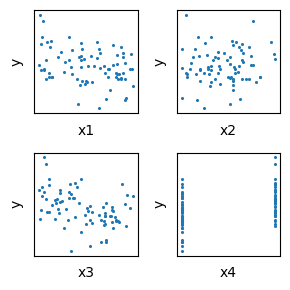

In [6]:
# Plot each variable against y in 2x2 grid
plt.figure(figsize=(3, 3))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.scatter(all_X[:, i], all_y, s=1.5)
    plt.xlabel(f"x{i + 1}")
    plt.ylabel("y")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()


In [7]:
# Represents all possible different regression setups
class Model:
    def __init__(self, poly_degree, to_normalize, model):
        self.poly_degree = poly_degree
        self.to_normalize = to_normalize
        self.model = model

        if poly_degree > 1:
            self.poly = PolynomialFeatures(degree=poly_degree)
        
        self.name = "Model("
        self.name += f"degree={self.poly_degree}"
        self.name += f", normalize={self.to_normalize}"
        self.name += f", model={self.model.__class__.__name__}"
        if self.model.__class__.__name__ == "Ridge":
            self.name += f", alpha={self.model.alpha}"
        self.name += ")"
    
    def fit(self, X, y):
        # Apply polynomial features
        if self.poly_degree > 1:
            X = self.poly.fit_transform(X)
    
        # Normalize data to have mean 0 and std 1
        if self.to_normalize:
            mean = np.mean(X, axis=0)
            std = np.std(X, axis=0)
            std[std == 0] = 1
            X = (X - mean) / std
        
        self.model.fit(X, y)
    
    def predict(self, X):
        # Apply polynomial features
        if self.poly_degree > 1:
            X = self.poly.transform(X)
        
        # Normalize data to have mean 0 and std 1
        if self.to_normalize:
            mean = np.mean(X, axis=0)
            std = np.std(X, axis=0)
            std[std == 0] = 1
            X = (X - mean) / std

        return self.model.predict(X)

# Represents multiple models combined together
class PiecewiseModel:
    def __init__(self, boundary_masker, models):
        self.boundary_masker = boundary_masker
        self.models = models
        self.name = "PiecewiseModel(["
        self.name += ",".join([model.name for model in self.models])
        self.name += "])"

    def fit(self, X, y):
        # Fit each model with the corresponding masked data
        for i, model in enumerate(self.models):
            mask = self.boundary_masker(X, i)
            model.fit(X[mask], y[mask])

    def predict(self, X):
        # Predict using each model with their corresponding masked data
        y = np.zeros(X.shape[0])
        for i, model in enumerate(self.models):
            mask = self.boundary_masker(X, i)
            y[mask] = model.predict(X[mask])
        return y


[2.77555756e-17 1.00000000e-01 2.00000000e-01 6.00000000e-01
 1.00000000e+00]


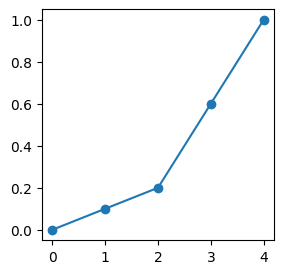

In [8]:
# Sanity check piecewise works
def boundary_masker(X, i):
    if i == 0: return X[:, 0] < 2
    else: return X[:, 0] >= 2
piecewise_x = np.array([[0], [1], [2], [3], [4]])
piecewise_y = np.array([0, 0.1, 0.2, 0.6, 1])
piecewise = PiecewiseModel(boundary_masker, [Model(1, False, LinearRegression()), Model(1, False, LinearRegression())])
piecewise.fit(piecewise_x, piecewise_y)
print(piecewise.predict(piecewise_x.reshape(-1, 1)))
plt.figure(figsize=(3, 3))
plt.scatter(piecewise_x, piecewise_y)
plt.plot(piecewise_x, piecewise.predict(piecewise_x))
plt.show()


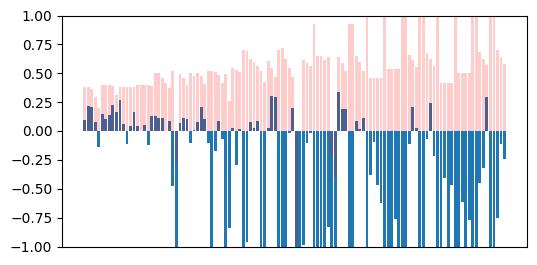

--- Results ---
Best model: Model(degree=4, normalize=True, model=Ridge, alpha=0.1)
Best model, mean R2 KFold=5: 0.33428997746725964
Best model, R2 over all data: 0.6380187792688217


In [9]:
def boundary_masker(X, i):
    # Piecewise based on col 3
    if i == 0: return X[:, 3] < 0.05
    else: return X[:, 3] >= 0.05

# Setup all the models to evaluate
models = []
for poly_degree in range(1, 7):
    for to_normalize in [False, True]:
        for to_piecewise in [False, True]:

            # Piecewise linear regression
            if to_piecewise:
                models.append(PiecewiseModel(boundary_masker, [
                    Model(poly_degree, to_normalize, LinearRegression()),
                    Model(poly_degree, to_normalize, LinearRegression())
                ]))

            # Single linear regression
            else:
                models.append(Model(poly_degree, to_normalize, LinearRegression()))

            for alpha in [0.0, 0.1, 1.0, 10.0]:
                # Piecewise ridge regression
                if to_piecewise:
                    models.append(PiecewiseModel(boundary_masker, [
                        Model(poly_degree, to_normalize, Ridge(alpha=alpha)),
                        Model(poly_degree, to_normalize, Ridge(alpha=alpha))
                    ]))

                # Single ridge regression
                else:
                    models.append(Model(poly_degree, to_normalize, Ridge(alpha=alpha)))

# For each KFold, train each model, calculate mean R2
np.random.seed(1)
kf = KFold(n_splits=5, shuffle=True)

models_r2_kfmean = []
models_r2_all = []
for model in models:
    r2s = []
    for train_idx, test_idx in kf.split(all_X):
        model.fit(all_X[train_idx], all_y[train_idx])
        pred_test_y = model.predict(all_X[test_idx])
        r2s.append(r2_score(all_y[test_idx], pred_test_y))
    models_r2_kfmean.append(np.mean(r2s))

    model.fit(all_X, all_y)
    pred_all_y = model.predict(all_X)
    models_r2_all.append(r2_score(all_y, pred_all_y))

# Plot mean R2 / all data R2 to see overall performance
plt.figure(figsize=(6, 3))
plt.bar(range(len(models_r2_kfmean)), models_r2_kfmean)
plt.bar(range(len(models_r2_all)), models_r2_all, alpha=0.2, color="red")
plt.xticks([])
plt.ylim(-1, 1)
plt.show()

print("--- Results ---")
best_idx = np.argmax(models_r2_kfmean)
best_model = models[best_idx]
best_r2_mean = models_r2_kfmean[best_idx]
best_r2_all = models_r2_all[best_idx]
print(f"Best model: {best_model.name}")
print(f"Best model, mean R2 KFold=5: {best_r2_mean}")
print(f"Best model, R2 over all data: {best_r2_all}")

# Train best model against full data again
best_model.fit(all_X, all_y)


### Reasoning

I produce a set of models varying the following:  

- Data polynomial basis **(1 - 6)**
- Data normalization **(yes / no)**
- Whether to use piecewise regression **(yes / no)**  
- Regression model **(linear / ridge)**
  - For ridge regression, alpha value **(0.1, 1, 10)**  

For piecewise regression I use 2 of the same model, split on some boundary.  
From inspection of the data, column `w` is binary between 2 values.  
Due to complexity constraints I only tested a piecewise regression with 1 boundary on `w` in these 2 classes.  

For training, I need to consider overfitting due to only having 80 values, as I want a generalised model.  
If my number of parameters > number of data points the regressor might "remember" the values.  
To prevent this, I use  k-fold data splitting:  

- Split data into $k$ groups
- Leave 1 group out and fit model on the rest
- Use the 1 group for prediction and R2 score

I can then average the R2 score over the folds and use that as the main metric.  

An issue here arises due to the result being different every time its ran if k-fold is set to shuffle.  
Evidently the results are highly dependant on how the random groups are assigned.  

Generally however it seems a **single (non-piecewise) ridge regression** works the best.  
The degree of polynomial basis, whether to normalize, and the alpha, changes per run.

In [10]:
# Predict best model against PADL-Q2-unseen.csv
with open("PADL-Q2-unseen.csv", "r") as f:
    reader = csv.reader(f)
    data = np.array(list(reader)[1:]).astype(float)
test_X = data[:, :-1]
test_y = data[:, -1]
pred_y = best_model.predict(test_X)
r2 = r2_score(test_y, pred_y)
print(f"Test R2: {r2}")


Test R2: 0.6380187792688217


# Q3. Embeddings

In [124]:
# Q3. Embeddings

# Imports
import re
from gensim.models import Word2Vec

# Read pg48320.txt
with open("pg48320.txt", "r", encoding="utf-8") as f:
    text = f.read()


## a. Extract Words

**1. Clean the text.**  

- Remove all punctuation, apart from hyphens and newlines.  
- Convert the text to lowercase.  

**2. Extract Sentences and words.**  

- Sentences for training a Word2Vec model found by splitting on "\n" then " ".  
- Words found by just joining all sentences together.

**3. Extract Triplets.**

- Simple loop over words, checking previous / next and adding to a list.

In [125]:
# Preprocess text
clean_text = re.sub(r"[^a-zA-Z \-]", " ", text).lower()

# Split text into non-empty words
words = clean_text.split(" ")

# Extract triplets where middle word is "the"
triplets = set()
for i in range(1, len(words) - 1):
    if words[i] == "the":
        triplets.add((words[i - 1], words[i], words[i + 1]))

print(f"Found {len(text)} characters, {len(words)} words, {len(triplets)} triplets.")


Found 595374 characters, 139178 words, 4360 triplets.


## b. Find Matching Triplets

We just need to loop over the keywords, and perform the suitability check.  
Check the relevant word has 3+ characters, and then check the suffix.  

**Note:** This could be improved by checking the world is different from the keyword.  

In [126]:
# For each keyword
keywords = ["gold", "diamond", "robbery", "bank", "police"]
keyword_triplets = []
for keyword in keywords:

    # For each triplet
    matching_triplets = []
    for triplet in triplets:
        word = triplet[2]
        
        # Check suffixes match atleast 3 characters
        if len(word) >= 3 and keyword[-3:] == word[-3:]:
            matching_triplets.append(triplet)
    
    # Found all matching triplets
    keyword_triplets.append(matching_triplets)
    print(f"Keyword {keyword} has {len(matching_triplets)} matching triplets")
    print(matching_triplets)
    print("")


Keyword gold has 21 matching triplets
[('of', 'the', 'old'), ('as', 'the', 'old'), ('to', 'the', 'old'), ('said', 'the', 'old'), ('by', 'the', 'old'), ('from', 'the', 'old'), ('in', 'the', 'household'), ('with', 'the', 'gold'), ('', 'the', 'old'), ('into', 'the', 'manifold'), ('one', 'the', 'old'), ('screamed', 'the', 'old'), ('of', 'the', 'gold'), ('crossed', 'the', 'threshold'), ('and', 'the', 'two-hundred-year-old'), ('over', 'the', 'threshold'), ('in', 'the', 'cold'), ('in', 'the', 'old'), ('remember', 'the', 'old'), ('do', 'the', 'old'), ('rack', 'the', 'old')]

Keyword diamond has 11 matching triplets
[('observe', 'the', 'second'), ('of', 'the', 'second'), ('in', 'the', 'second'), ('upon', 'the', 'second'), ('', 'the', 'second'), ('snap', 'the', 'bond'), ('solder', 'the', 'second'), ('at', 'the', 'second'), ('if', 'the', 'second'), ('to', 'the', 'second'), ('armitage', 'the', 'second')]

Keyword robbery has 32 matching triplets
[('in', 'the', 'very'), ('discovering', 'the', 'robb

## c. Find Semantically Good Triplets

In [128]:
# Train word2vec over all words
model = Word2Vec([ words ], vector_size=300, window=5, min_count=1, workers=4)

# For each keyword and associated triplets
keyword_triplets_best = []
for i in range(len(keyword_triplets)):
    print(f"Checking keyword '{keywords[i]}' top 5 triplets")

    # Sort triplets by similarity of word 1 and word 3
    scored_triplets = [ (t, model.wv.similarity(t[0], t[2])) for t in keyword_triplets[i] ]
    scored_triplets = sorted(scored_triplets, key=lambda x: x[1], reverse=True)
    scored_triplets = [ t[0] for t in scored_triplets[:5] ]

    # Found top 5 triplets
    keyword_triplets_best.append(scored_triplets)
    print(scored_triplets)
    print("")


Checking keyword 'gold' top 5 triplets
[('from', 'the', 'old'), ('one', 'the', 'old'), ('by', 'the', 'old'), ('in', 'the', 'old'), ('as', 'the', 'old')]

Checking keyword 'diamond' top 5 triplets
[('if', 'the', 'second'), ('at', 'the', 'second'), ('in', 'the', 'second'), ('to', 'the', 'second'), ('of', 'the', 'second')]

Checking keyword 'robbery' top 5 triplets
[('is', 'the', 'very'), ('to', 'the', 'very'), ('was', 'the', 'very'), ('of', 'the', 'very'), ('that', 'the', 'very')]

Checking keyword 'bank' top 5 triplets
[('upon', 'the', 'mud-bank'), ('was', 'the', 'clank'), ('expect', 'the', 'bank'), ('leaves', 'the', 'bank'), ('from', 'the', 'bank')]

Checking keyword 'police' top 5 triplets
[('from', 'the', 'office'), ('in', 'the', 'office'), ('into', 'the', 'office'), ('at', 'the', 'office'), ('of', 'the', 'office')]



# Q4. Basic MLP

# Q5. Telling the Time

# Q6. Generative